In [124]:
import numpy as np
import pandas as pd

health = pd.read_csv("../Datasets/rankmd.csv", delimiter=";")
FastFood = pd.read_csv("../Datasets/FastFoodRestaurants.csv")
income = pd.read_csv("../Datasets/kaggle_income.csv", encoding="ISO 8859-1")
FastFood['State'] = FastFood['province'].map(abbrev_to_us_state)
States = health[health['FIPS'].astype(str).str.endswith('000')]

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

 # Overall look at key features of the datasets across States

In [125]:
print("Top 5 states with the most Premature Deaths:")
States.sort_values("premature_deathDeaths",ascending=False).head()

Top 5 states with the most Premature Deaths:


,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
190,6000,California,NaN,NaN,350612.0,5253.0,5228.0,5278.0,NaN,9636.0,...,74.0,75.0,75.0,75.0,18191555,42,42,42,NaN,NaN
2566,48000,Texas,NaN,NaN,302432.0,6620.0,6587.0,6653.0,NaN,3497.0,...,79.0,82.0,82.0,82.0,13115511,39,39,39,NaN,NaN
329,12000,Florida,NaN,NaN,266657.0,7188.0,7145.0,7231.0,NaN,5380.0,...,77.0,81.0,81.0,81.0,9383111,42,42,43,NaN,NaN
1860,36000,New York,NaN,NaN,191195.0,5406.0,5370.0,5443.0,NaN,4789.0,...,35.0,63.0,63.0,63.0,9300315,39,38,39,NaN,NaN
2078,39000,Ohio,NaN,NaN,169097.0,8545.0,8484.0,8607.0,NaN,4405.0,...,76.0,85.0,85.0,85.0,5488776,31,31,31,NaN,NaN


[Text(0.5, 1.0, 'Percentage of Obese people per state'),
 Text(0.5, 0, 'Percentage of adult people with obesity')]

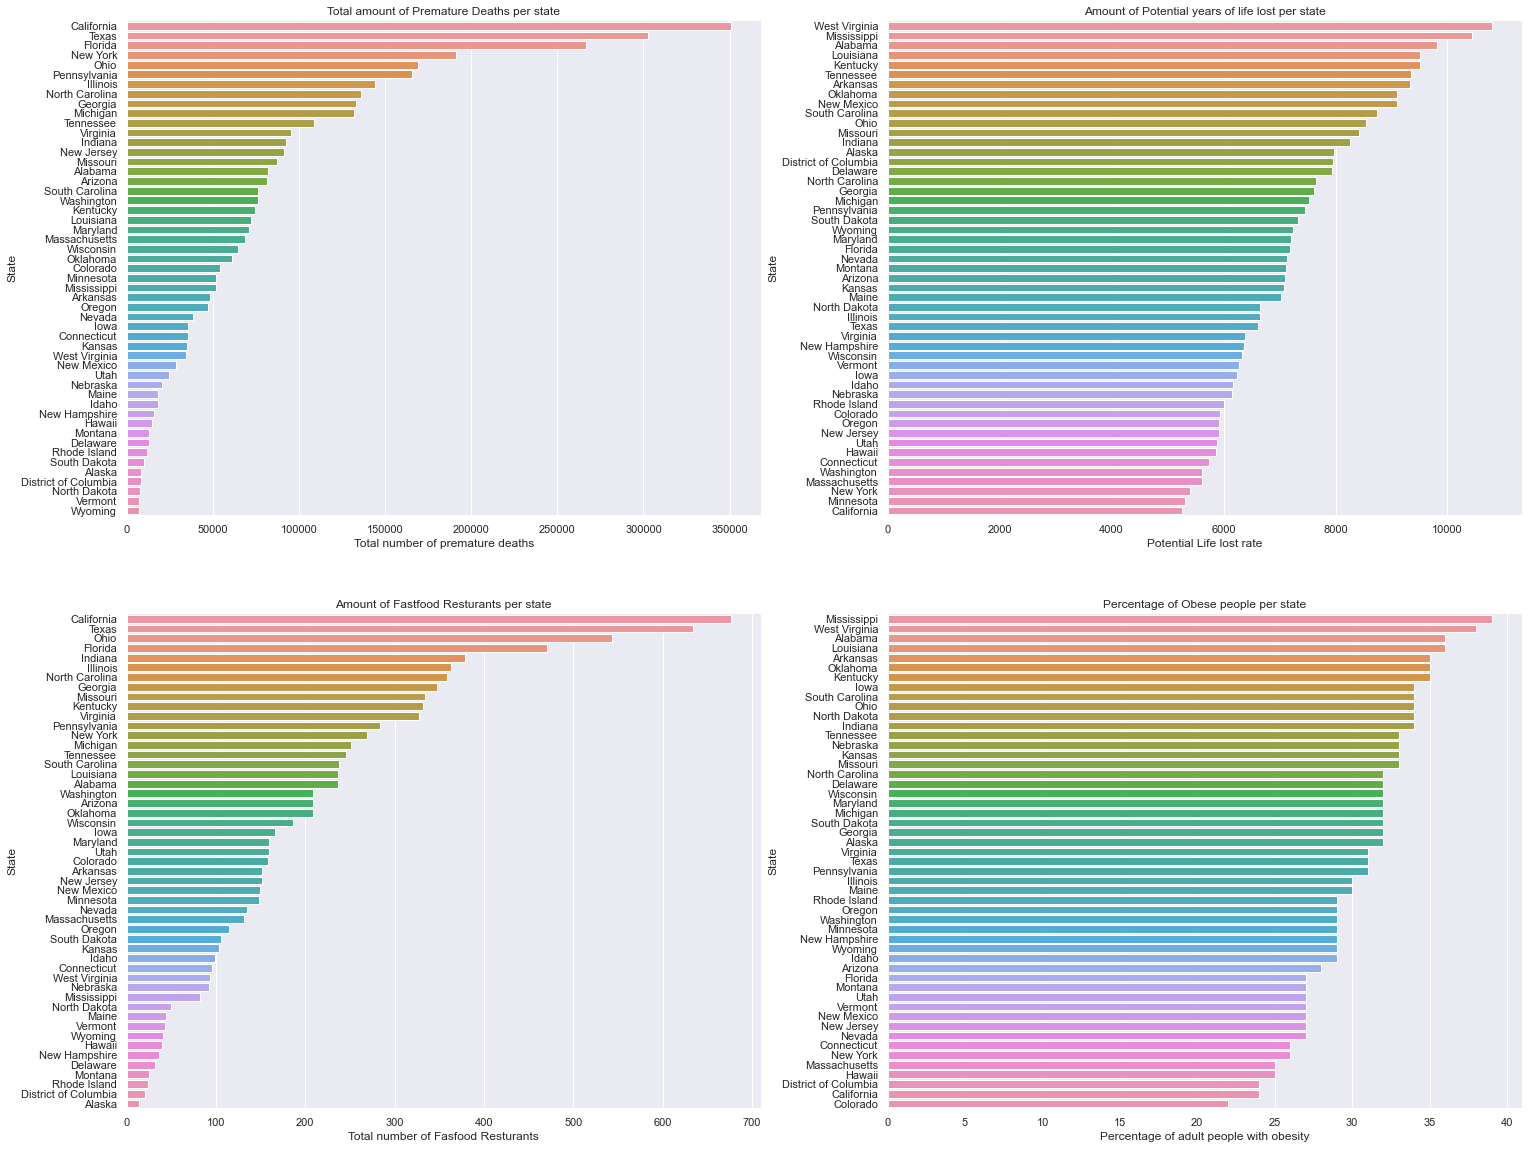

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(25,20))

sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(ax=axes[0,0], data=States.sort_values("premature_deathDeaths",ascending=False), y='State', x='premature_deathDeaths').set(title='Total amount of Premature Deaths per state',  xlabel='Total number of premature deaths')
sns.barplot(ax=axes[0,1], data=States.sort_values("premature_deathYears_of_Potential_Life_Lost_Rate",ascending=False), y='State', x='premature_deathYears_of_Potential_Life_Lost_Rate').set(title='Amount of Potential years of life lost per state',  xlabel='Potential Life lost rate')
sns.barplot(ax=axes[1,0], data=FastFood.groupby(['State']).count().reset_index().sort_values("address",ascending=False), y='State', x='address').set(title='Amount of Fastfood Resturants per state', xlabel='Total number of Fasfood Resturants')
sns.barplot(ax=axes[1,1], data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state', xlabel='Percentage of adult people with obesity')

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_4639/2295135035.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FastFood["Chain"] = FastFood["name"].str.lower().str.replace(r"[\"\',]", '').str.replace(r"\-"," ")


[Text(0.5, 1.0, 'Number of Resturants per the 50 most popular chains'),
 Text(0.5, 0, 'Number of Resturants')]

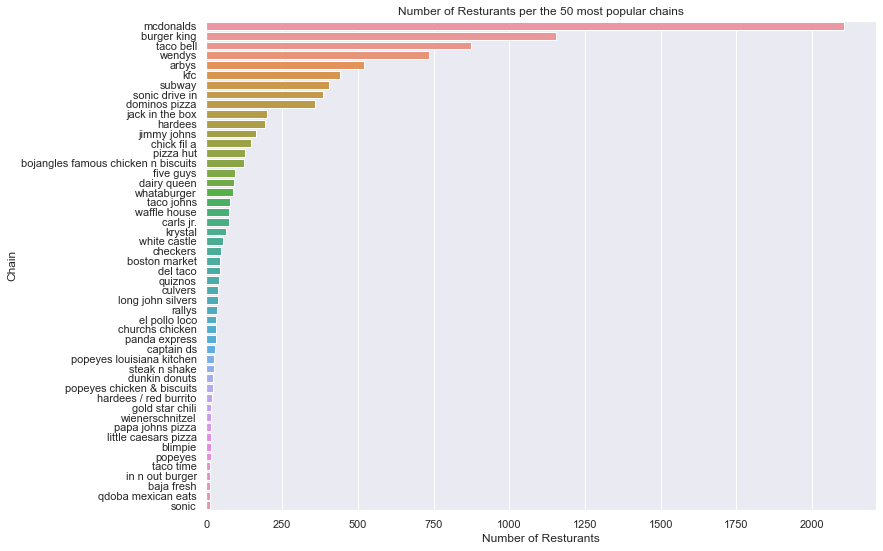

In [129]:
FastFood["Chain"] = FastFood["name"].str.lower().str.replace(r"[\"\',]", '').str.replace(r"\-"," ")
sns.barplot(data=FastFood.groupby(['Chain']).count().reset_index().sort_values('address',ascending=False)[0:50], y='Chain', x='address').set(title='Number of Resturants per the 50 most popular chains', xlabel='Number of Resturants')
